## Exploratory data analysis

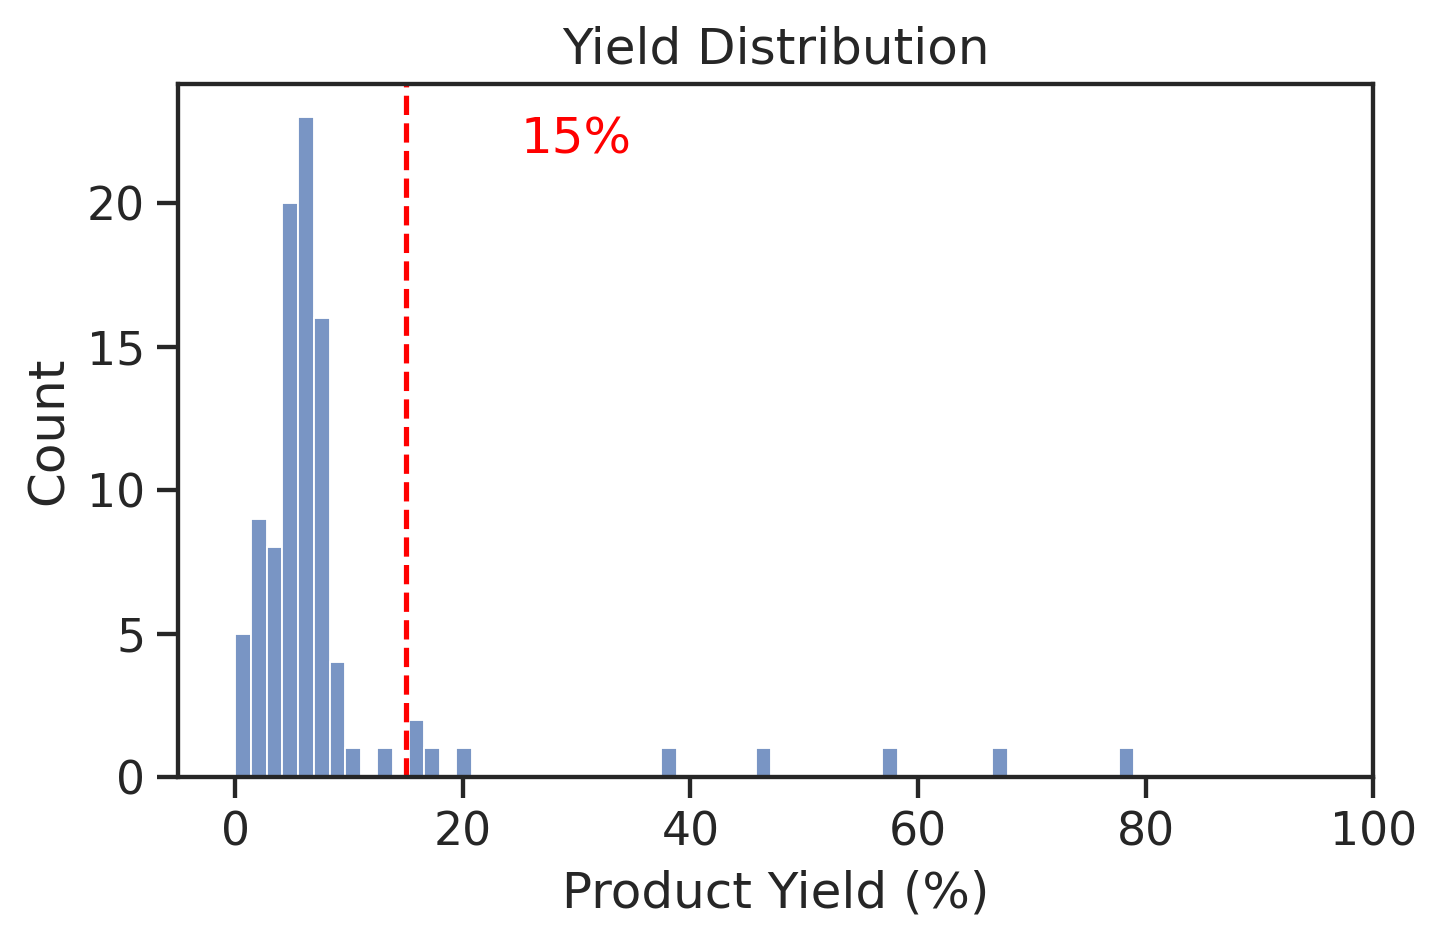

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cset = ["#BB5566", "#004488", "#DDAA33"]

df = pd.read_csv("data/ligand-qsar/alkylamine-hte-ligand-data.tsv", sep="\t")
sns.set_theme(
    rc={"figure.figsize": (6, 4), "figure.dpi": 250}, style="ticks", font_scale=1.2
)
df = df[df["buchwald-type"] == 1].reset_index(drop=True)

ax = sns.histplot(df, x="product_1_yield")
ax.set_xlabel("Product Yield (%)")
ax.set_ylabel("Count")
ax.set_title("Yield Distribution")
ax.set_xlim(-5, 100)
ax.axvline(x=15, color="red", linestyle="--", linewidth=1.5)
ax.text(30, ax.get_ylim()[1] * 0.9, "15%", color="red", ha="center")
plt.tight_layout()

/tmp/ipykernel_12438/3551492220.py:28: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  ax.legend(


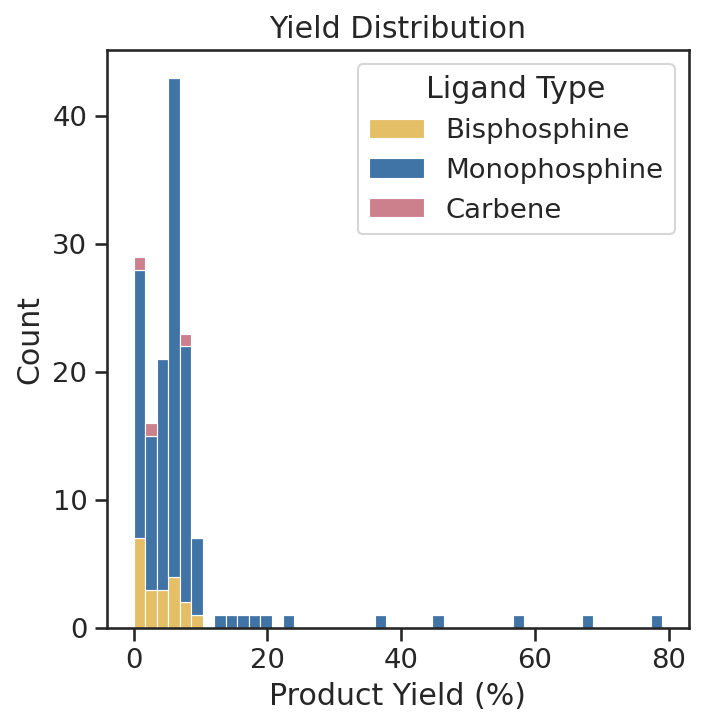

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cset = ["#BB5566", "#004488", "#DDAA33"]

df = pd.read_csv("data/ligand-qsar/alkylamine-hte-ligand-data.tsv", sep="\t")
sns.set_theme(
    rc={"figure.figsize": (5, 5), "figure.dpi": 150}, style="ticks", font_scale=1.2
)

ax = sns.histplot(
    df,
    x="product_1_yield",
    bins="auto",
    hue="num_phos",
    legend=True,
    palette=list(cset),
    multiple="stack",
    hue_order=[0, 1, 2],
)
ax.set_xlabel("Product Yield (%)")
ax.set_ylabel("Count")
ax.set_title("Yield Distribution")

legend = ax.get_legend()
handles = legend.legend_handles
ax.legend(
    handles,
    title="Ligand Type",
    loc="upper right",
    labels=[
        "Bisphosphine",
        "Monophosphine",
        "Carbene",
    ],
)

In [3]:
from great_tables import GT

stats = pd.DataFrame.from_dict(
    {
        "Metric": [
            "Number of reactions",
            "Reactions with yields > 0",
            "Reactions with yields > 15",
            "Reactions with yields > 50",
            "Number of Monophosphine Ligands",
            "Number of Buchwald-Type Ligands",
            "Mean yield",
            "Median yield",
            "Max yield",
            "Min yield",
        ],
        "Value": [
            len(df),
            len(df[df["product_1_yield"] > 0]),
            len(df[df["product_1_yield"] > 15]),
            len(df[df["product_1_yield"] > 50]),
            len(df[df["num_phos"] == 1]),
            len(df[df["buchwald-type"] == 1]),
            round(df["product_1_yield"].mean(), 1),
            df["product_1_yield"].median(),
            df["product_1_yield"].max(),
            df["product_1_yield"].min(),
        ],
    }
)

(
    GT(stats)
    .tab_header(title="Summary Statistics")
    .tab_options(heading_title_font_size="20px", column_labels_font_size="16px")
    .opt_vertical_padding(scale=1)
    .opt_horizontal_padding(scale=3)
    .opt_table_outline()
    .opt_row_striping()
)  # .save("/home/nhadler/projects/abbvie-cn-couplings/figures/ligand_qsar/summary_stats.pdf", scale=2.0)

GT(_tbl_data=                            Metric  Value
0              Number of reactions  150.0
1        Reactions with yields > 0  140.0
2       Reactions with yields > 15   10.0
3       Reactions with yields > 50    3.0
4  Number of Monophosphine Ligands  127.0
5  Number of Buchwald-Type Ligands   96.0
6                       Mean yield    6.9
7                     Median yield    5.4
8                        Max yield   79.0
9                        Min yield    0.0, _body=<great_tables._gt_data.Body object at 0x7fa3b6ba3ce0>, _boxhead=Boxhead([ColInfo(var='Metric', type=<ColInfoTypeEnum.default: 1>, column_label='Metric', column_align='left', column_width=None), ColInfo(var='Value', type=<ColInfoTypeEnum.default: 1>, column_label='Value', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7fa3b4b40950>, _spanners=Spanners([]), _heading=Heading(title='Summary Statistics', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7fa3b4a84bf0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='3px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='3px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='3px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='3px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value